<a href="https://colab.research.google.com/github/knkamil/Machine-Learning/blob/main/Week_4ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Student Exam Success Based on Lifestyle Factors**

## Introduction
In this demo, we'll explore how to use various machine learning classification models to predict whether a student will pass an exam based on several lifestyle and academic factors. This problem is relatable and interesting because it deals with student performance—something that most people have experienced.

We'll use the following classification models:

- K-Nearest Neighbors (KNN)
- Logistic Regression
- Decision Trees
- Random Forest

We'll also visualize the decision tree to understand how it makes decisions based on input features.

## **Dataset Creation**
We'll create a synthetic dataset with the following features:

- StudyHours: Number of hours the student studies per week.
- SleepHours: Average hours of sleep per night.
- ClassAttendance: Percentage of classes attended.
- PreviousGrade: Grade from the previous exam (0-100 scale).
- Extracurricular: Number of extracurricular activities.
- SocialMediaUsage: Hours spent on social media per day.
- PartTimeJob: Whether the student has a part-time job (0 = No, 1 = Yes).
- **Target Variable:** *Pass: Whether the student passed the exam (1 = Pass, 0 = Fail).*

In [ ]:
import numpy as np
import pandas as pd

#Set a random seed for reproducibility
np.random.seed(42)

#Number of samples
n_samples = 500

# Generate features
StudyHours = np.random.normal(20, 5, n_samples).clip(5, 35)
SleepHours = np.random.normal(7, 1.5, n_samples).clip(4, 10)
ClassAttendance = np.random.normal(85, 10, n_samples).clip(50, 100)
PreviousGrade = np.random.normal(75, 15, n_samples).clip(40, 100)
Extracurricular = np.random.poisson(2, n_samples)
SocialMediaUsage = np.random.normal(3, 1, n_samples).clip(0, 6)
PartTimeJob = np.random.binomial(1, 0.3, n_samples)

# Create a DataFrame
df = pd.DataFrame({
    'StudyHours': StudyHours,
    'SleepHours': SleepHours,
    'ClassAttendance': ClassAttendance,
    'PreviousGrade': PreviousGrade,
    'Extracurricular': Extracurricular,
    'SocialMediaUsage': SocialMediaUsage,
    'PartTimeJob': PartTimeJob
})

# Adjusted linear combination
linear_combination = (
    0.3 * df['StudyHours'] +
    0.2 * df['SleepHours'] +
    0.3 * df['ClassAttendance'] +
    0.2 * df['PreviousGrade'] -
    0.2 * df['SocialMediaUsage'] -
    0.3 * df['PartTimeJob'] * 10 +
    np.random.normal(0, 5, n_samples) -
    100 # Subtracting 100 to center around zero
)

# Adjusted sigmoind function
def sigmoid(x):
  return 1 / (1 + np.exp(-x / 15)) # Adjusted the scaling factor

probabilities = sigmoid(linear_combination)

# Visualize the probabilities
# import matplotlib.pyplot as plt
# plt.hist(probabilities. bins=50)
# plt.title('Distribution of Probabilities')
# plt.xlabel('Probability')
# plt.ylabel('Frequency')
# #plt.show()

# Generate the 'Pass' target variable
threshold = 0.025
df['Pass'] = np.where(probabilities > threshold, 1, 0)

# Verify the distribution of 'Pass' and 'Fail'
print(df['Pass'].value_counts())

Pass
1    293
0    207
Name: count, dtype: int64


In [ ]:
df.head(10)

,StudyHours,SleepHours,ClassAttendance,PreviousGrade,Extracurricular,SocialMediaUsage,PartTimeJob,Pass
0,22.483571,8.389266,98.993554,86.675416,1,5.281652,0,1
1,19.308678,9.864125,94.246337,66.732214,1,2.382358,1,0
2,23.238443,4.902149,85.596304,62.727017,2,1.464960,0,1
3,27.615149,7.844454,78.530632,74.949383,3,1.119990,0,0
4,18.829233,6.024036,91.982233,72.447231,3,3.712712,0,1
5,18.829315,6.269312,88.934854,68.201579,0,1.116850,1,0
6,27.896064,6.111409,93.951932,85.445812,1,2.627681,1,1
7,23.837174,5.704014,91.351718,89.329578,1,3.437313,0,1
8,17.652628,7.072782,95.495527,76.326103,4,3.185176,0,1
9,22.712800,5.753575,79.647648,97.162951,1,3.425445,1,1


**Exploratory Data Analysis (EDA)**

Let's perform a brief EDA to understand the dataset

       StudyHours  SleepHours  ClassAttendance  PreviousGrade  \
count  500.000000  500.000000       500.000000     500.000000   
mean    20.027287    7.044368        85.694208      75.290599   
std      4.866174    1.418767         9.400030      13.959923   
min      5.000000    4.000000        56.037446      40.000000   
25%     16.498463    6.107062        78.975704      65.820958   
50%     20.063986    7.042797        86.198058      74.866300   
75%     23.183916    7.976863        92.547384      85.496541   
max     35.000000   10.000000       100.000000     100.000000   

       Extracurricular  SocialMediaUsage  PartTimeJob        Pass  
count       500.000000        500.000000   500.000000  500.000000  
mean          1.988000          3.061673     0.290000    0.586000  
std           1.394182          1.044014     0.454216    0.493042  
min           0.000000          0.070551     0.000000    0.000000  
25%           1.000000          2.271874     0.000000    0.000000  
50%   

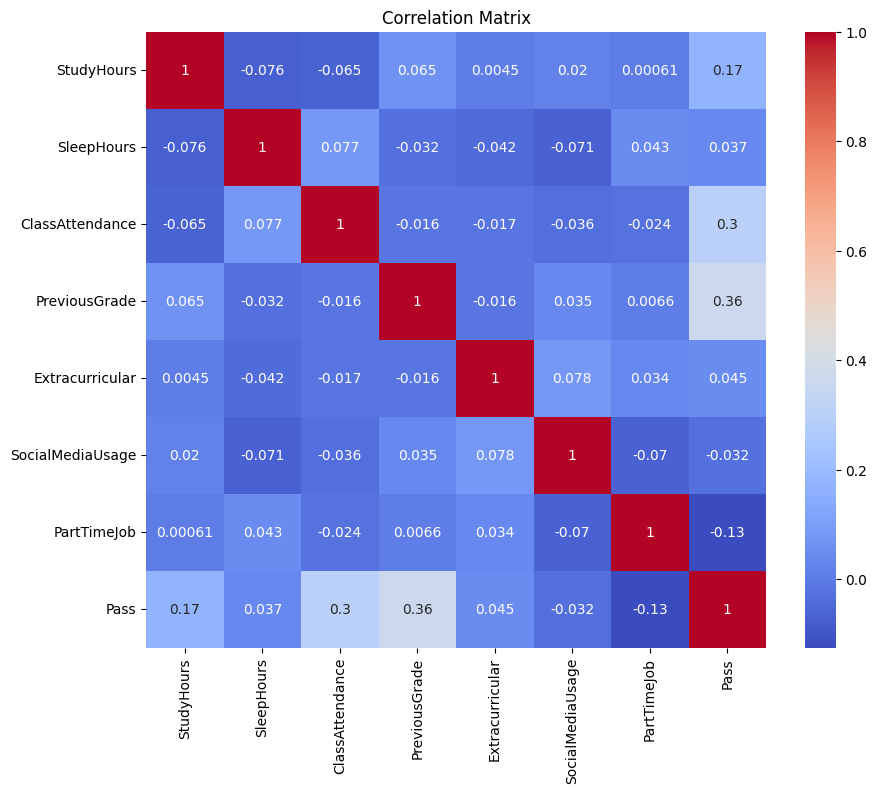

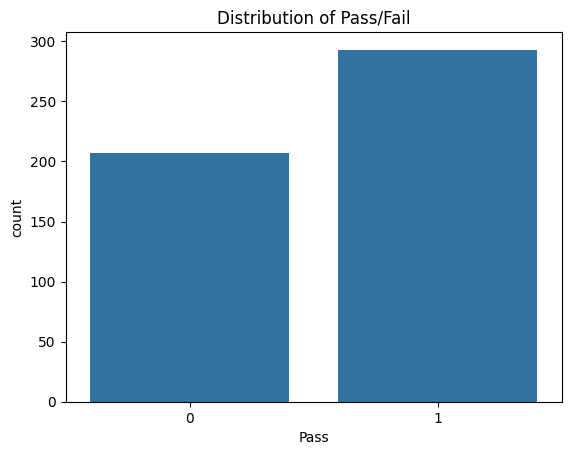

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

#Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of the target varible
sns.countplot(x='Pass', data=df)
plt.title('Distribution of Pass/Fail')
plt.show()

**Data Preprocessing**



*   Feature Scaling: We'll use StandardScaler for scaling features
*   Train-Test Split: We'll split the data into training and testing sets



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop('Pass', axis=1)
y = df['Pass']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
X

,StudyHours,SleepHours,ClassAttendance,PreviousGrade,Extracurricular,SocialMediaUsage,PartTimeJob
0,22.483571,8.389266,98.993554,86.675416,1,5.281652,0
1,19.308678,9.864125,94.246337,66.732214,1,2.382358,1
2,23.238443,4.902149,85.596304,62.727017,2,1.464960,0
3,27.615149,7.844454,78.530632,74.949383,3,1.119990,0
4,18.829233,6.024036,91.982233,72.447231,3,3.712712,0
...,...,...,...,...,...,...,...
495,22.694550,6.578350,100.000000,91.052254,1,3.264775,0
496,14.813769,9.696530,100.000000,74.602181,2,4.275391,0
497,19.048307,7.961264,97.083662,61.771880,0,2.848286,0
498,15.621909,6.143232,95.240625,72.553996,4,3.533359,0


In [ ]:
y

,Pass
0,1
1,0
2,1
3,0
4,1
...,...
495,1
496,1
497,1
498,0


In [ ]:
X_train

,StudyHours,SleepHours,ClassAttendance,PreviousGrade,Extracurricular,SocialMediaUsage,PartTimeJob
401,17.003125,6.409992,90.366528,69.992708,4,1.520556,0
482,11.967768,5.549536,100.000000,65.599242,2,2.935311,0
216,16.135874,7.171341,78.265094,79.979705,2,2.777525,1
461,20.176318,8.993729,72.757018,79.283311,2,2.174346,0
335,19.264713,7.351322,81.629140,80.422553,2,5.067906,0
...,...,...,...,...,...,...,...
310,18.911594,6.719693,84.749730,67.754084,1,3.045223,0
162,25.792978,6.950870,71.104275,43.172177,1,2.406189,0
299,23.148144,7.044634,88.216978,75.319675,2,2.786543,0
230,16.348167,7.293768,79.425082,71.648010,2,3.425844,0


In [ ]:
y_train

,Pass
401,1
482,0
216,1
461,1
335,0
...,...
310,1
162,0
299,1
230,0


**Modelling**

We'll train and evaluate the following models

*   K-Nearest Neighbors(KNN)
*   Logistic Regression
*   Decision Tree
*   Random Forest

We'll use accuracy as the evaluation metric







**KNN**

KNN Accuracy:  0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.57      0.67        51
           1       0.66      0.86      0.74        49

    accuracy                           0.71       100
   macro avg       0.73      0.71      0.71       100
weighted avg       0.73      0.71      0.70       100



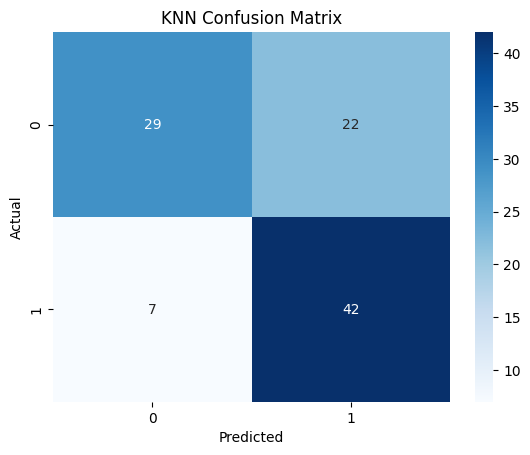

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the model
knn = KNeighborsClassifier(n_neighbors = 5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predications
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn: .2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot = True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Logistic Regression**

Logistic Regression Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.63      0.71        51
           1       0.69      0.86      0.76        49

    accuracy                           0.74       100
   macro avg       0.75      0.74      0.74       100
weighted avg       0.76      0.74      0.74       100



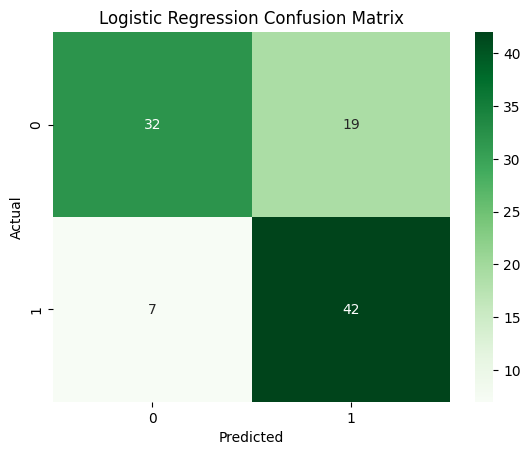

In [ ]:
from sklearn.linear_model import LogisticRegression

#Instantiate the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train_scaled, y_train)

# Make Predictions
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

#Classfication Report
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot = True, fmt = 'd', cmap = "Greens")
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Decision Tree**

Decision Tree Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.61      0.65        51
           1       0.64      0.73      0.69        49

    accuracy                           0.67       100
   macro avg       0.67      0.67      0.67       100
weighted avg       0.67      0.67      0.67       100



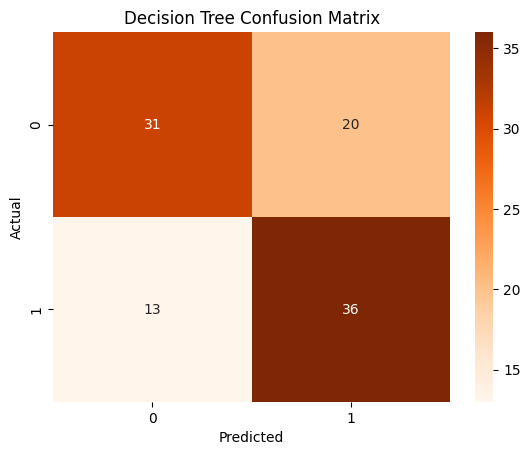

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Instantiate the model
dtree = DecisionTreeClassifier(max_depth=4, random_state = 42)

# Train the Model
dtree.fit(X_train, y_train)

#Make predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree Accuracy: {accuracy_dtree:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dtree), annot = True, fmt = 'd', cmap = 'Oranges')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


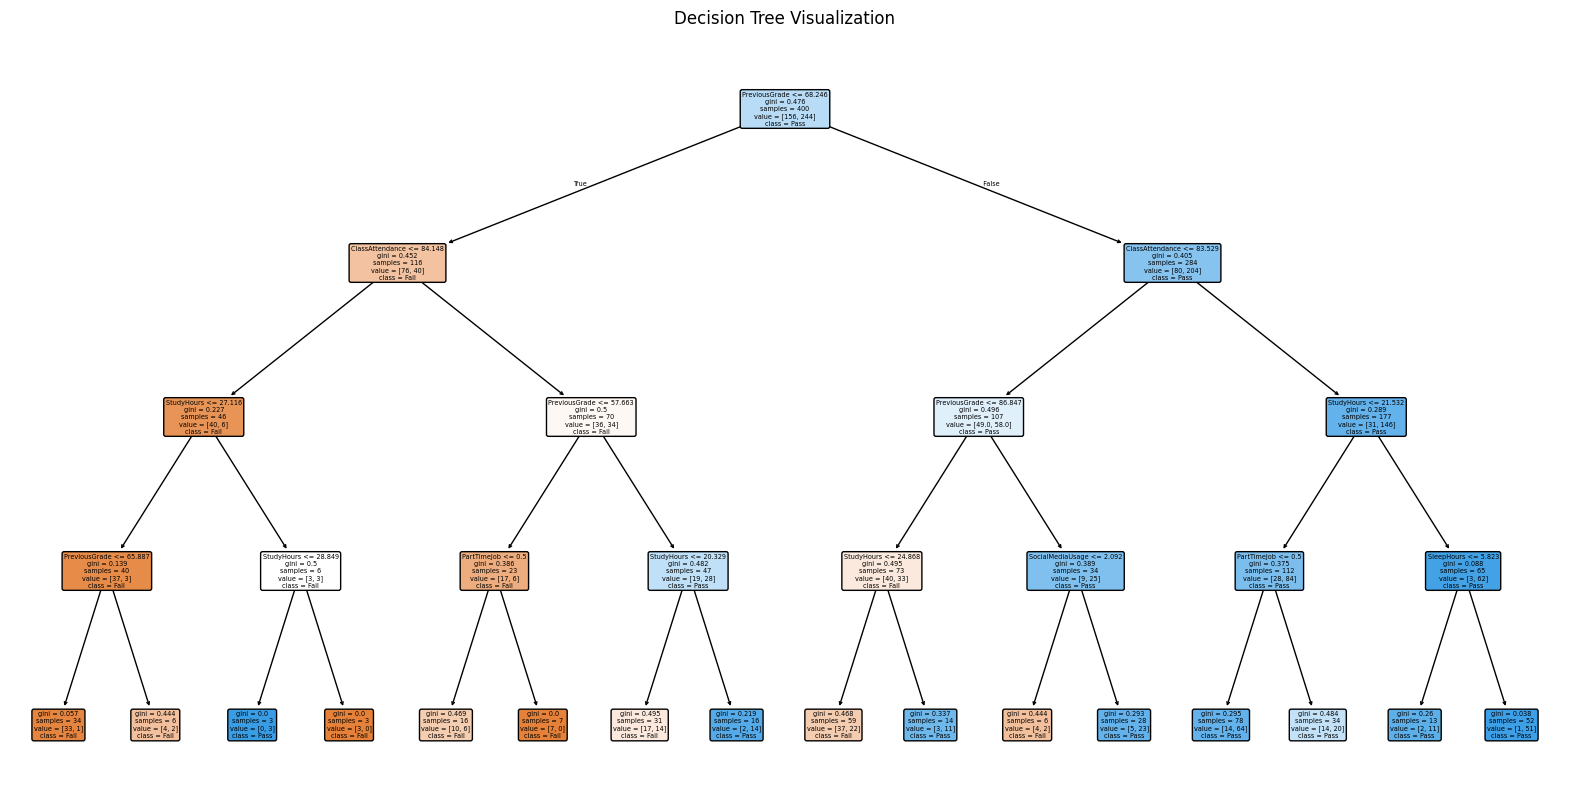

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    dtree,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=['Fail', 'Pass']
)
plt.title('Decision Tree Visualization')
plt.show()

- Explanation:

The visualization shows how the decision tree splits the data based on feature values to make predictions.
Each node displays the condition, the number of samples, and the class distribution.

**Random Forest**

Random Forest Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.45      0.59        51
           1       0.62      0.92      0.74        49

    accuracy                           0.68       100
   macro avg       0.73      0.68      0.66       100
weighted avg       0.74      0.68      0.66       100



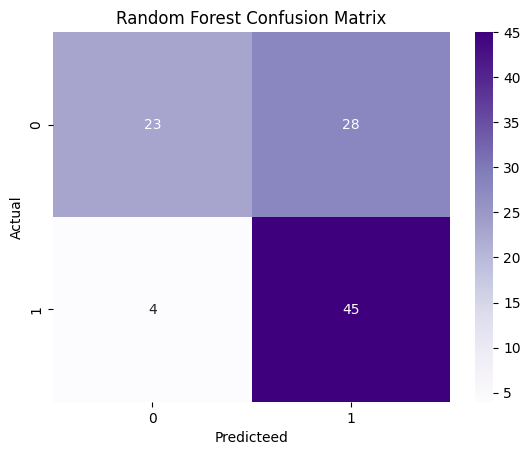

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf = RandomForestClassifier(n_estimators = 100, max_depth = 4, random_state =42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot= True, fmt = 'd', cmap = 'Purples')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicteed')
plt.ylabel('Actual')
plt.show()

/tmp/ipython-input-2973668243.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')


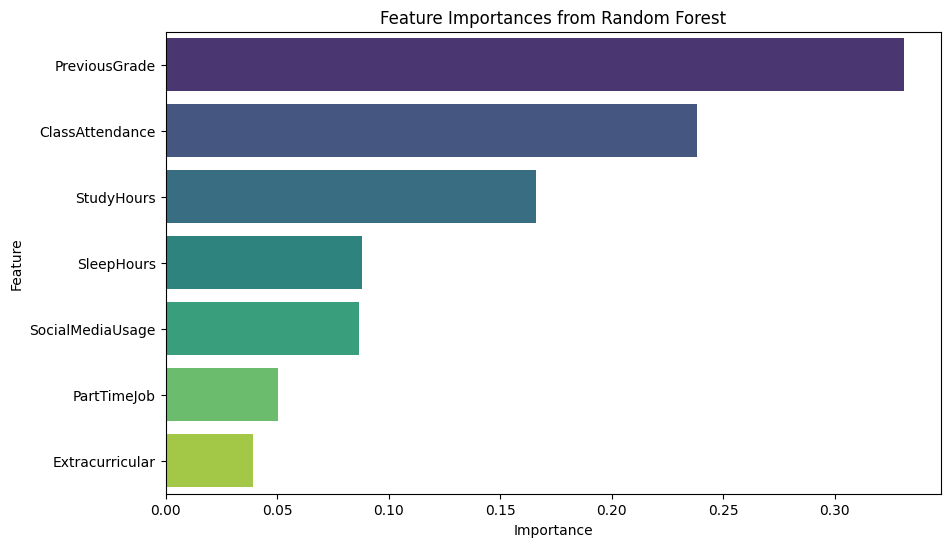

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()